reuter dataset: 뉴스 기사, 토픽

data
- 정수 리스트 (단어 인덱스)
- train data : 8982개
- test data : 2246개

label
- 토픽의 인덱스
- 0~45 사이의정수


In [1]:
from keras.datasets import reuters
import numpy as np

Using TensorFlow backend.


In [2]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

np.load = np_load_old

In [3]:
word_index = reuters.get_word_index()
revers_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([revers_word_index.get(i-3, '?') for i in train_data[0]])

In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

[ 데이터를 벡터로 변환 ]

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

[ 모델 정의 ]
- 64개의 유닛
- 3개의 층
- 손실함수 : categorical_crossentropy => 두 확률 분포 사이의 거리를 측정

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

[ 훈련 ]
- 훈련 데이터에서 1000개를 검증 세트로 사용
- 에포크 : 20
- 배치 사이즈 : 512

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 569us/step - loss: 2.5334 - acc: 0.4946 - val_loss: 1.7233 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 2s 201us/step - loss: 1.4487 - acc: 0.6877 - val_loss: 1.3465 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.0972 - acc: 0.7647 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.8711 - acc: 0.8161 - val_loss: 1.0810 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.7042 - acc: 0.8477 - val_loss: 0.9839 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.5674 - acc: 0.8789 - val_loss: 0.9410 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 180us/step - loss: 0.4604 - a

[ 훈련, 손실 그래프 ]

In [14]:
import matplotlib.pyplot as plt

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

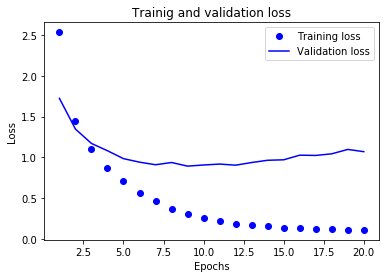

In [16]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

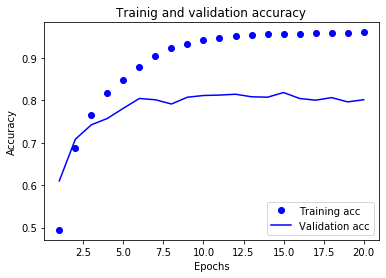

In [17]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trainig and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9번째 epoch부터 overfitting =>  epochs을 9로 변경하고 다시 학습

In [18]:
model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.1059 - acc: 0.9570 - val_loss: 1.1044 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.1018 - acc: 0.9580 - val_loss: 1.1117 - val_acc: 0.8060
Epoch 3/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.1021 - acc: 0.9592 - val_loss: 1.0954 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.1028 - acc: 0.9580 - val_loss: 1.1219 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.0974 - acc: 0.9595 - val_loss: 1.1495 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.0987 - acc: 0.9564 - val_loss: 1.2267 - val_acc: 0.7880
Epoch 7/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.0958 - acc: 0.9577 - val_loss: 1.1787 - val_acc: 0.7940
Epoch 8

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 192us/step


[1.354632099929497, 0.7809439003202179]

[ 새로운 데이터 예측하기 ]

In [20]:
predictions = model.predict(x_test)
predictions

array([[1.2250192e-06, 1.1256770e-06, 1.5355169e-09, ..., 1.8270084e-09,
        1.1405280e-11, 8.8289355e-11],
       [3.0145969e-04, 7.1963216e-03, 3.2358589e-08, ..., 1.3921841e-09,
        3.6752645e-12, 3.0870131e-06],
       [1.1709489e-02, 9.0621877e-01, 7.2777490e-05, ..., 2.3470377e-06,
        1.5179555e-07, 6.3005323e-06],
       ...,
       [7.4565662e-08, 5.4473065e-07, 5.4524878e-09, ..., 1.7609726e-10,
        2.0622047e-10, 2.5337782e-11],
       [2.9005599e-03, 2.1916336e-01, 5.2920179e-05, ..., 2.8430299e-05,
        5.1009668e-08, 1.6059258e-07],
       [1.9403038e-05, 7.8212756e-01, 5.9121498e-03, ..., 2.5041208e-08,
        1.1003539e-12, 9.2611614e-08]], dtype=float32)

[ 충분히 큰 중간층을 두어야 하는 이유 ]
- 마지막 출력인 46차원보다 중간층 히든 유닛이 더 많아야 한다.
- 병목 => accuracy가 낮아진다

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 128,
                   validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 291us/step - loss: 3.1603 - acc: 0.2415 - val_loss: 2.6036 - val_acc: 0.2750
Epoch 2/20
7982/7982 [==============================] - 2s 235us/step - loss: 2.0490 - acc: 0.5452 - val_loss: 1.6985 - val_acc: 0.5850
Epoch 3/20
7982/7982 [==============================] - 2s 235us/step - loss: 1.4995 - acc: 0.6225 - val_loss: 1.5108 - val_acc: 0.6400
Epoch 4/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.2865 - acc: 0.6923 - val_loss: 1.4134 - val_acc: 0.6750
Epoch 5/20
7982/7982 [==============================] - 2s 242us/step - loss: 1.1441 - acc: 0.7161 - val_loss: 1.3636 - val_acc: 0.6840
Epoch 6/20
7982/7982 [==============================] - 2s 244us/step - loss: 1.0387 - acc: 0.7308 - val_loss: 1.3469 - val_acc: 0.6900
Epoch 7/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.9561 - acc: 0.7422 - val_loss: 1.3384 - val_acc: 0.6990


[1.9708690566880727, 0.6869991095280499]